<a href="https://www.kaggle.com/code/phillipgregory1994/laptop-sales-clustering-regression-0-86-r2?scriptVersionId=175623511" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-sales-price-prediction-dataset-2024/laptop_cleaned2.csv


# Laptop Sales: Investigating Clustering & Regression

## Overview
This dataset contains information about various laptops, including specifications and prices, curated for sales price prediction. With features ranging from processor details to display specifications, this dataset serves as a valuable resource for analyzing trends and predicting laptop prices.

**Column Descriptions**

* Name: Name of the laptop model.
* Brand: Brand of the laptop.
* Price: Price of the laptop (Original price is in INR, but I will convert to help me interpret trends)
* Rating: Rating of the laptop.
* Processor_brand: Brand of the laptop's processor.
* Processor_name: Name of the laptop's processor.
* Processor_variant: Variant of the laptop's processor.
* Processor_gen: Generation of the laptop's processor.
* Core_per_processor: Number of cores per processor.
* Total_processor: Total number of processors.
* Execution_units: Number of execution units.
* Low_Power_Cores: Number of low-power cores.
* Energy_Efficient_Units: Indicates if the laptop has energy-efficient units.
* Threads: Number of threads.
* RAM_GB: RAM capacity of the laptop in gigabytes.
* RAM_type: Type of RAM.
* Storage_capacity_GB: Storage capacity of the laptop in gigabytes.
* Storage_type: Type of storage.
* Graphics_name: Name of the laptop's graphics.
* Graphics_brand: Brand of the laptop's graphics.
* Graphics_GB: Graphics capacity in gigabytes.
* Graphics_integrated: Indicates if the laptop has integrated graphics.
* Display_size_inches: Size of the laptop's display in inches.
* Horizontal_pixel: Number of horizontal pixels.
* Vertical_pixel: Number of vertical pixels.
* ppi: Pixels per inch.
* Touch_screen: Indicates if the laptop has a touch screen.
* Operating_system: Operating system of the laptop.

## Objectives
1. Conduct an exploratory data analysis (EDA)
2. Perform clustering
3. Analyse the various clusters
4. Pre-process data for regression to predict laptop prices
5. Perform regression with and without using 'Cluster' as a feature: Does clustering prior to regression improve results in the case of predicting laptop prices?
8. Conclude the notebook with a summary of findings

## EDA

In [2]:
# Initial imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import the data
address = '/kaggle/input/laptop-sales-price-prediction-dataset-2024/laptop_cleaned2.csv'
df = pd.read_csv(address)

# Show the first 5 rows of the dataframe
df.head()

,Unnamed: 0,Name,Brand,Price,Rating,Processor_brand,Processor_name,Processor_variant,Processor_gen,Core_per_processor,...,Graphics_name,Graphics_brand,Graphics_GB,Graphics_integreted,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi,Touch_screen,Operating_system
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,HP,50399,4.30,AMD,AMD Ryzen 5,5600H,5.0,6.0,...,AMD Radeon RX 6500M,AMD,4.0,False,15.6,1920,1080,141.21,True,Windows 11 OS
1,1,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,Lenovo,26690,4.45,AMD,AMD Ryzen 3,7320U,7.0,4.0,...,AMD Radeon Graphics,AMD,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS
2,2,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,HP,37012,4.65,Intel,Intel Core i3,1215U,12.0,6.0,...,Intel UHD Graphics,Intel,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,Samsung,69990,4.75,Intel,Intel Core i5,1240P,12.0,12.0,...,Intel Iris Xe Graphics,Intel,NaN,False,13.3,1080,1920,165.63,False,Windows 11 OS
4,4,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,Tecno,23990,4.25,Intel,Intel Core i3,1115G4,11.0,2.0,...,Intel UHD Graphics,Intel,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS


In [4]:
# Drop the 'Unnamed: 0' column as this contains no useful information
df = df.drop('Unnamed: 0', axis=1)

# Print the shape of the dataframe
print(f"The data frame has {df.shape[0]} rows and {df.shape[1]} columns")

The data frame has 1020 rows and 28 columns


In [5]:
# Print the data types of the columns
df.dtypes

Name                       object
Brand                      object
Price                       int64
Rating                    float64
Processor_brand            object
Processor_name             object
Processor_variant          object
Processor_gen             float64
Core_per_processor        float64
Total_processor           float64
Execution_units           float64
Low_Power_Cores           float64
Energy_Efficient_Units      int64
Threads                   float64
RAM_GB                      int64
RAM_type                   object
Storage_capacity_GB         int64
Storage_type               object
Graphics_name              object
Graphics_brand             object
Graphics_GB               float64
Graphics_integreted        object
Display_size_inches       float64
Horizontal_pixel            int64
Vertical_pixel              int64
ppi                       float64
Touch_screen                 bool
Operating_system           object
dtype: object

In [6]:
# Check for missing values
df.isnull().sum()

Name                        0
Brand                       0
Price                       0
Rating                      0
Processor_brand             0
Processor_name              0
Processor_variant          24
Processor_gen             129
Core_per_processor         12
Total_processor           447
Execution_units           447
Low_Power_Cores             0
Energy_Efficient_Units      0
Threads                    48
RAM_GB                      0
RAM_type                   22
Storage_capacity_GB         0
Storage_type                0
Graphics_name               2
Graphics_brand              2
Graphics_GB               652
Graphics_integreted         2
Display_size_inches         0
Horizontal_pixel            0
Vertical_pixel              0
ppi                         0
Touch_screen                0
Operating_system            0
dtype: int64

In [7]:
# Check for duplicate rows
df.duplicated().sum()

0

In [8]:
# Convert Price column from INR to GBP for easier interpretation. Exchange rate used is 1 INR = 0.0096 GBP
df['Price_GBP'] = df['Price'] * 0.0096

# Drop the original Price column
df = df.drop('Price', axis=1)

# Check price is now a float
df['Price_GBP'].dtype

dtype('float64')

In [9]:
# Generate descriptive statistics
df.describe()

,Rating,Processor_gen,Core_per_processor,Total_processor,Execution_units,Low_Power_Cores,Energy_Efficient_Units,Threads,RAM_GB,Storage_capacity_GB,Graphics_GB,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi,Price_GBP
count,1020.000000,891.000000,1008.000000,573.000000,573.000000,1020.000000,1020.000000,972.000000,1020.000000,1020.000000,368.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,4.373676,10.450056,8.572421,3.926702,6.998255,0.086275,0.043137,12.817901,13.992157,627.733333,5.940217,15.163775,2035.512745,1214.019608,157.178265,787.809355
std,0.233295,2.966579,4.375012,1.954429,2.680217,0.406531,0.203266,5.677459,7.189564,316.911679,2.667130,1.001537,409.209289,306.863086,33.585713,638.420646
min,3.950000,1.000000,2.000000,1.000000,4.000000,0.000000,0.000000,2.000000,2.000000,32.000000,2.000000,11.600000,1080.000000,768.000000,100.450000,76.800000
25%,4.200000,7.000000,6.000000,2.000000,4.000000,0.000000,0.000000,8.000000,8.000000,512.000000,4.000000,14.000000,1920.000000,1080.000000,141.210000,422.304000
50%,4.350000,12.000000,8.000000,4.000000,8.000000,0.000000,0.000000,12.000000,16.000000,512.000000,6.000000,15.600000,1920.000000,1080.000000,141.210000,611.419200
75%,4.550000,13.000000,10.000000,6.000000,8.000000,0.000000,0.000000,16.000000,16.000000,512.000000,8.000000,15.600000,1920.000000,1200.000000,161.730000,911.904000
max,4.750000,14.000000,24.000000,12.000000,16.000000,2.000000,1.000000,32.000000,64.000000,4000.000000,16.000000,18.000000,3840.000000,2560.000000,337.930000,5759.904000


* There is a wide price range from GBP76.80 to GBP5759.90. Due to these extremes, outliers will need to be investigated.
* I assume Rating runs from 1-5. However, the minimum rating is 3.95 and the maximum is 4.75. This indicates all the listed laptops are well received by reviewers.

In [10]:
# Isolate numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

numerical_columns

Index(['Rating', 'Processor_gen', 'Core_per_processor', 'Total_processor',
       'Execution_units', 'Low_Power_Cores', 'Energy_Efficient_Units',
       'Threads', 'RAM_GB', 'Storage_capacity_GB', 'Graphics_GB',
       'Display_size_inches', 'Horizontal_pixel', 'Vertical_pixel', 'ppi',
       'Price_GBP'],
      dtype='object')

In [11]:
# Check correlation between float columns and price
correlation = df[numerical_columns].corrwith(df['Price_GBP']).sort_values(ascending=False)
correlation[1:]

Graphics_GB               0.818311
RAM_GB                    0.766483
Threads                   0.728987
Core_per_processor        0.713484
Vertical_pixel            0.673096
Horizontal_pixel          0.671428
Storage_capacity_GB       0.667047
Total_processor           0.624849
ppi                       0.586424
Execution_units           0.533587
Processor_gen             0.264586
Display_size_inches       0.240546
Low_Power_Cores           0.201841
Energy_Efficient_Units    0.201841
Rating                   -0.042246
dtype: float64

**Correlation Coefficient Guidelines**
* **0.70 to 1**: Strong positive correlation (Green line)
* **0.30 to 0.69**: Moderate positive correlation (Orange line)
* **0.10 to 0.29**: Weak positive correlation (Red line)
* **0 to 0.09**: No correlation

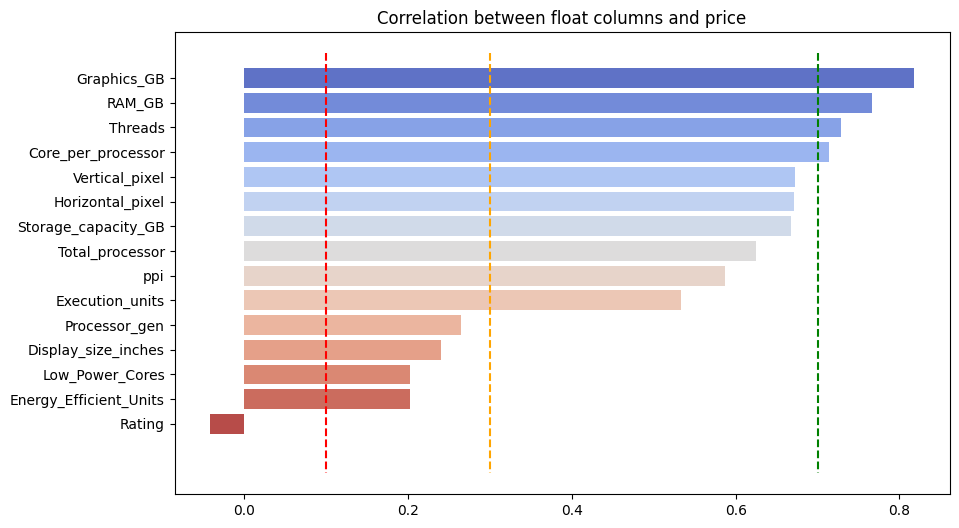

In [12]:
# Visualise correlations in a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation[1:], y=correlation.index[1:], palette='coolwarm')
plt.vlines(x=[0.1,0.3, 0.7], ymin=-1, ymax=correlation.shape[0], colors=['red','orange','green'], linestyles='dashed')
plt.title('Correlation between float columns and price')
plt.show()

There are 4 numerical features that are strongly positively correlated with laptop price:
* Graphics_GB: Graphics capacity in gigabytes
* RAM_GB: RAM capacity of the laptop in gigabytes
* Threads: Number of threads
* Core_per_processor: Number of cores per processor

I will use these 4 features to formulate my clusters

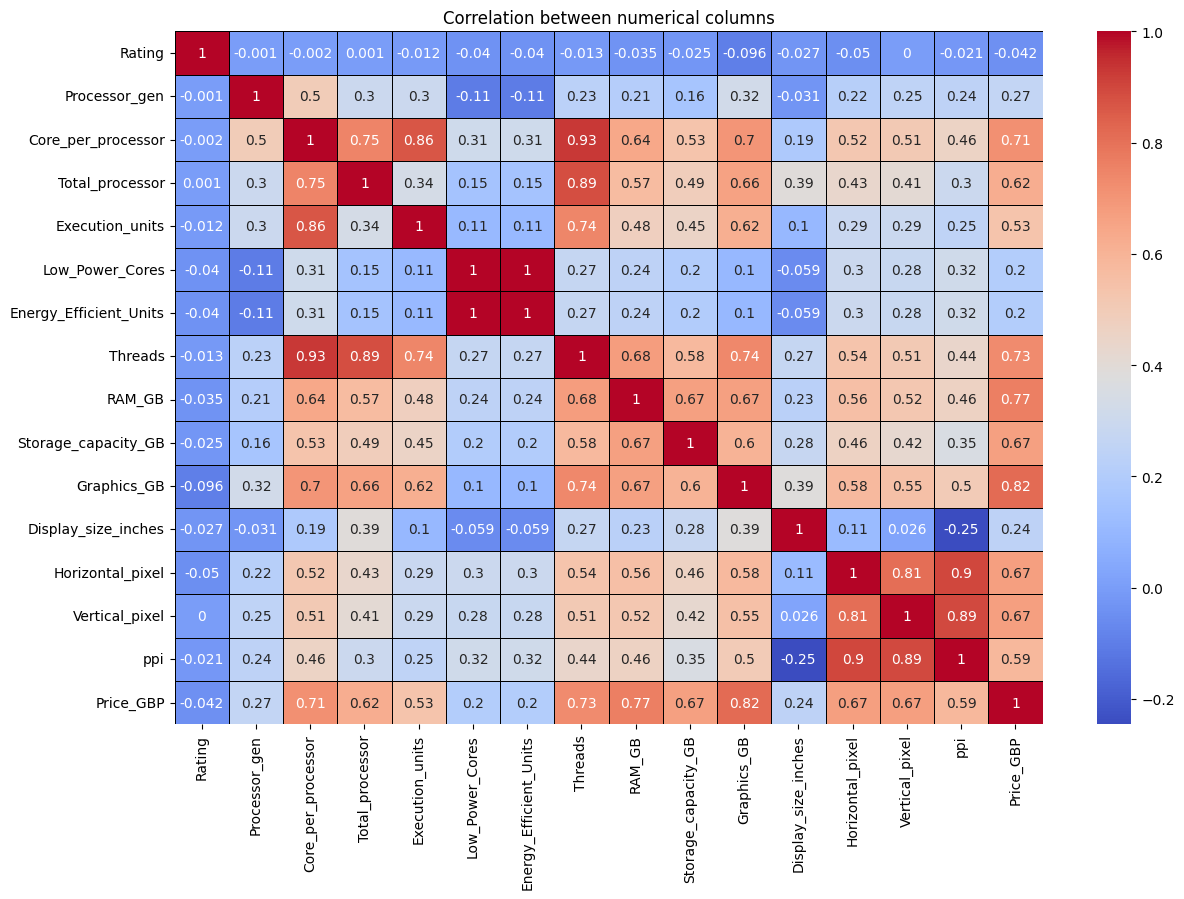

In [13]:
# Check correlation across all float columns
plt.figure(figsize=(14, 9))
sns.heatmap(round(df[numerical_columns].corr(),3), annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation between numerical columns')
plt.show()

In [14]:
# Check correlation between energy efficient units and low power cores
print(df['Energy_Efficient_Units'].value_counts())
print(df['Low_Power_Cores'].value_counts())

Energy_Efficient_Units
0    976
1     44
Name: count, dtype: int64
Low_Power_Cores
0.0    976
2.0     44
Name: count, dtype: int64


In [15]:
# Drop Low_Power_Cores column as it has the same information as Energy_Efficient_Units
df = df.drop('Low_Power_Cores', axis=1)

# Remove Low_Power_Cores from numerical_columns
numerical_columns = numerical_columns.drop('Low_Power_Cores')

In [16]:
# Check highest correlations between float columns
df[numerical_columns].corr().unstack().sort_values(ascending=False).drop_duplicates().to_frame().head(10)[1:]

0
Threads            Core_per_processor  0.929322
ppi                Horizontal_pixel    0.899781
                   Vertical_pixel      0.894170
Threads            Total_processor     0.885131
Core_per_processor Execution_units     0.864156
Price_GBP          Graphics_GB         0.818311
Vertical_pixel     Horizontal_pixel    0.806204
Price_GBP          RAM_GB              0.766483
Core_per_processor Total_processor     0.747524

* The number of cores is strongly postively correlated with the number of threads and execution units
* As ppi captures the information from horizontal and vertical pixels, I will drop the horizontal and vertical pixels columns

In [17]:
# Drop Horizontal_pixel and Vertical_pixel
df = df.drop(['Horizontal_pixel', 'Vertical_pixel'], axis=1)

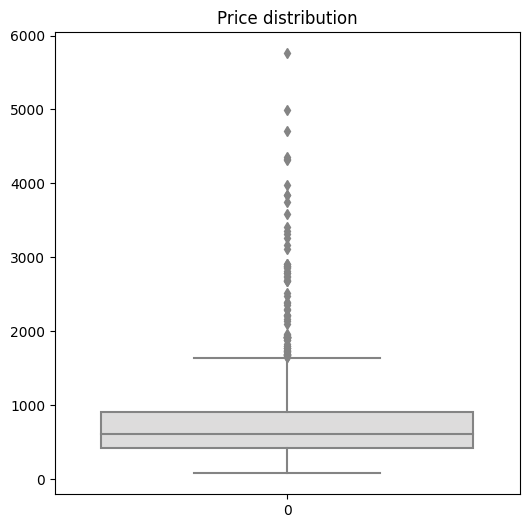

count    1020.000000
mean      787.809355
std       638.420646
min        76.800000
25%       422.304000
50%       611.419200
75%       911.904000
max      5759.904000
Name: Price_GBP, dtype: float64


In [18]:
# Analyse Price column to detect outliers
plt.figure(figsize=(6,6))
sns.boxplot(df['Price_GBP'], palette='coolwarm')
plt.title('Price distribution')
plt.show()

print(df.Price_GBP.describe())

* Most of the laptops are concentrated around the median price of around £611

In [19]:
# Check low price laptops to see if they are outliers
df[df['Price_GBP'] < 100]

,Name,Brand,Rating,Processor_brand,Processor_name,Processor_variant,Processor_gen,Core_per_processor,Total_processor,Execution_units,...,Storage_type,Graphics_name,Graphics_brand,Graphics_GB,Graphics_integreted,Display_size_inches,ppi,Touch_screen,Operating_system,Price_GBP
142,iBall Excelance CompBook Laptop (AQC/ 2GB/ 32G...,iBall,4.25,Intel,Intel Atom Quad,Z3735F,NaN,4.0,NaN,NaN,...,Hard Disk,Intel HD Graphics,Intel,NaN,False,11.6,135.09,False,Windows 10 OS,76.8


In [20]:
# Check high price laptops to see if they are outliers
df[df['Price_GBP'] > 4000]

,Name,Brand,Rating,Processor_brand,Processor_name,Processor_variant,Processor_gen,Core_per_processor,Total_processor,Execution_units,...,Storage_type,Graphics_name,Graphics_brand,Graphics_GB,Graphics_integreted,Display_size_inches,ppi,Touch_screen,Operating_system,Price_GBP
80,MSI Titan 18 HX Gaming Laptop (14th Gen Core i...,MSI,4.20,Intel,Intel Core i9,14900HX,14.0,NaN,NaN,NaN,...,SSD,NVIDIA GeForce RTX 4090,NVIDIA,16.0,False,18.0,251.57,False,Windows 11 OS,5759.9040
135,MSI Stealth 17 A13VH-055IN Gaming Laptop (13th...,MSI,4.70,Intel,Intel Core i9,13900H,13.0,14.0,6.0,8.0,...,SSD,Nvidia GeForce RTX4080,NVIDIA,12.0,False,17.3,254.67,False,Windows 11 OS,4702.8768
660,MSI CreatorPro X17 HX A13VKS-249IN Laptop (13t...,MSI,4.05,Intel,Intel Core i9,13980HX,13.0,24.0,8.0,16.0,...,SSD,NVIDIA GeForce RTX 3500 Ada,NVIDIA,12.0,False,17.0,177.58,False,Windows 11 OS,4991.9040
714,MSI CreatorPro Z16 HX B13VKTO-214IN Laptop (13...,MSI,4.60,Intel,Intel Core i9,13950HX,13.0,24.0,8.0,16.0,...,SSD,NVIDIA RTX 3000 Ada,NVIDIA,8.0,False,16.0,188.68,False,Windows 11 OS,4319.9040
876,Dell Alienware X16 Gaming Laptop (13th Gen Cor...,Dell,4.35,Intel,Intel Core i9,13900HK,13.0,14.0,6.0,8.0,...,SSD,NVIDIA GeForce RTX 4090,NVIDIA,16.0,False,16.0,229.47,False,Windows 11 OS,4358.3040
881,Dell Alienware M18 R1 2023 Gaming Laptop (13th...,Dell,4.00,Intel,Intel Core i9,13980HX,13.0,24.0,8.0,16.0,...,SSD,NVIDIA GeForce RTX 4090,NVIDIA,16.0,False,18.0,203.97,False,Windows 11 OS,4329.5040


* The most expensive laptops relate to high-end gaming laptops and appear to be valid entries
* None of the price outliers are to be dropped

In [21]:
# Isolate categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Check number of unique values in each categorical column
for column in categorical_columns:
    print(f"{column}: {df[column].nunique()} unique values")

Name: 1020 unique values
Brand: 31 unique values
Processor_brand: 7 unique values
Processor_name: 36 unique values
Processor_variant: 125 unique values
RAM_type: 12 unique values
Storage_type: 4 unique values
Graphics_name: 136 unique values
Graphics_brand: 7 unique values
Graphics_integreted: 2 unique values
Operating_system: 13 unique values


* Names are all unique. This column won't contribute much to clustering analysis, but it can be useful to trace findings back to individual laptop names.
* Indiviudal processor names, processor variants, and graphics names all have high cardinality which could lead to curse of dimensionality. Investigate if these columns are required for analysis

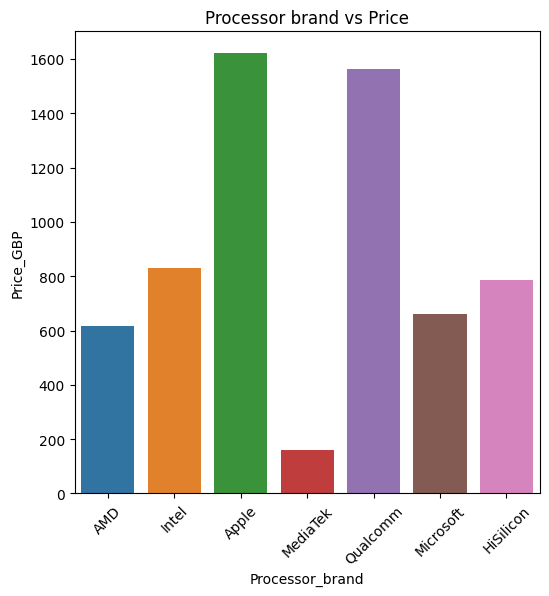

In [22]:
# Plot Processor_brand against the Price_GBP mean value
fig = plt.figure(figsize=(6, 6))
sns.barplot(x='Processor_brand', y='Price_GBP', data=df, errorbar=None)
plt.title('Processor brand vs Price')
plt.xticks(rotation=45)
plt.show()

* Apple and Qualcomm are the brands with the highest average laptop price
* To determine if processor names are required, compare different processors from the same brand and assess the variance

In [23]:
# Check unique values in processor names
df['Processor_name'].value_counts()[:10]

Processor_name
Intel Core i5       322
Intel Core i7       159
AMD Ryzen 5         119
Intel Core i3       114
AMD Ryzen 7          87
Intel Core i9        49
Intel Core Ultra     44
Intel Celeron        36
AMD Ryzen 3          31
Apple M3              7
Name: count, dtype: int64

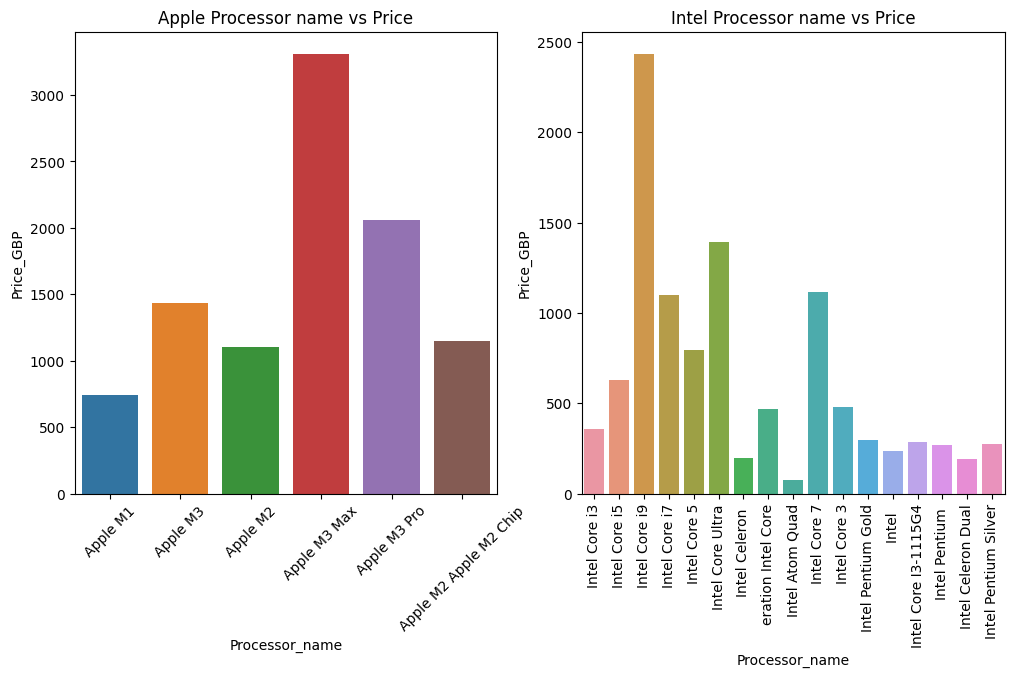

In [24]:
# Compare different Apple and Intel processor names against the Price_GBP mean value
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
sns.barplot(x='Processor_name', y='Price_GBP', data=df[df['Processor_brand'] == 'Apple'], ax=ax1, errorbar=None)
ax1.set_title('Apple Processor name vs Price')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
sns.barplot(x='Processor_name', y='Price_GBP', data=df[df['Processor_brand'] == 'Intel'], ax=ax2, errorbar=None)
ax2.set_title('Intel Processor name vs Price')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.show()

* The processor name seems to cause a lot of variance in the price. This is likely due to more powerful processors costing more.
* Check this by comparing processor names against Graphics_GB, RAM_GB, and Threads

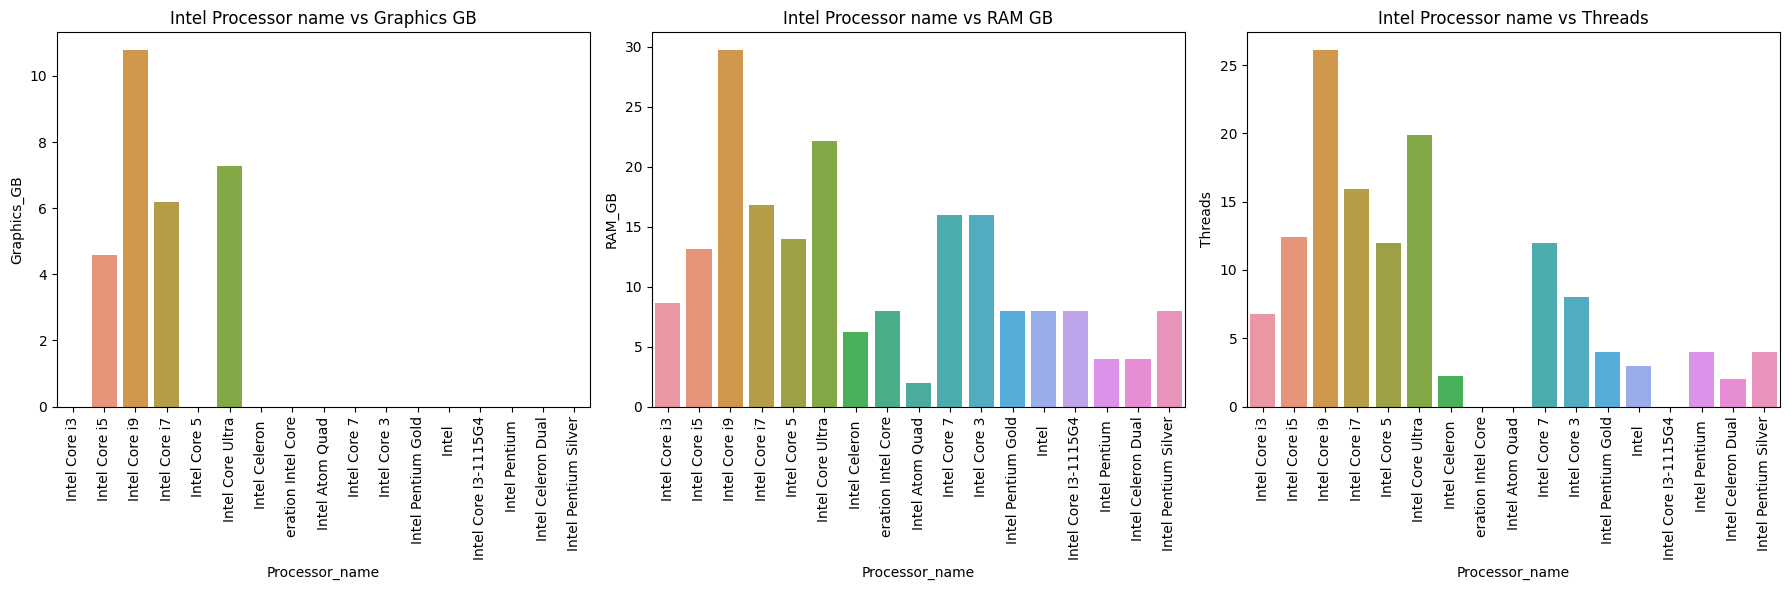

In [25]:
# Plot Intel Processor names against Graphics GB, RAM_GB, and Threads

# Filter data for Intel processors
intel_df = df[df['Processor_brand'] == 'Intel']

# Define columns for plotting
columns = ['Graphics_GB', 'RAM_GB', 'Threads']
titles = ['Intel Processor name vs Graphics GB',
          'Intel Processor name vs RAM GB',
          'Intel Processor name vs Threads']

# Create subplots
fig, axes = plt.subplots(1, len(columns), figsize=(18, 6))

# Plot each column
for i, (col, title) in enumerate(zip(columns, titles)):
    sns.barplot(x='Processor_name', y=col, data=intel_df, ax=axes[i], errorbar=None)
    axes[i].set_title(title)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

* Previous visualisations show the Intel Core i9 and the Intel Core Ultra had the highest Price
* These processor names also have the highest Graphics_GB, RAM_GB, Threads, which indicates that it is these features that drive the price rather than the name
* This supports my previous assumption that using the most highly correlated numerical variables with price will suffice for clustering
* Before performing regression, I will drop high cardinality columns such as Processor_name, Processor_variant, and Graphics_name

* Processor Variant and Graphics Name have 125 and 136 unique values respectively. Investigate if these features contribute to the price prediction.

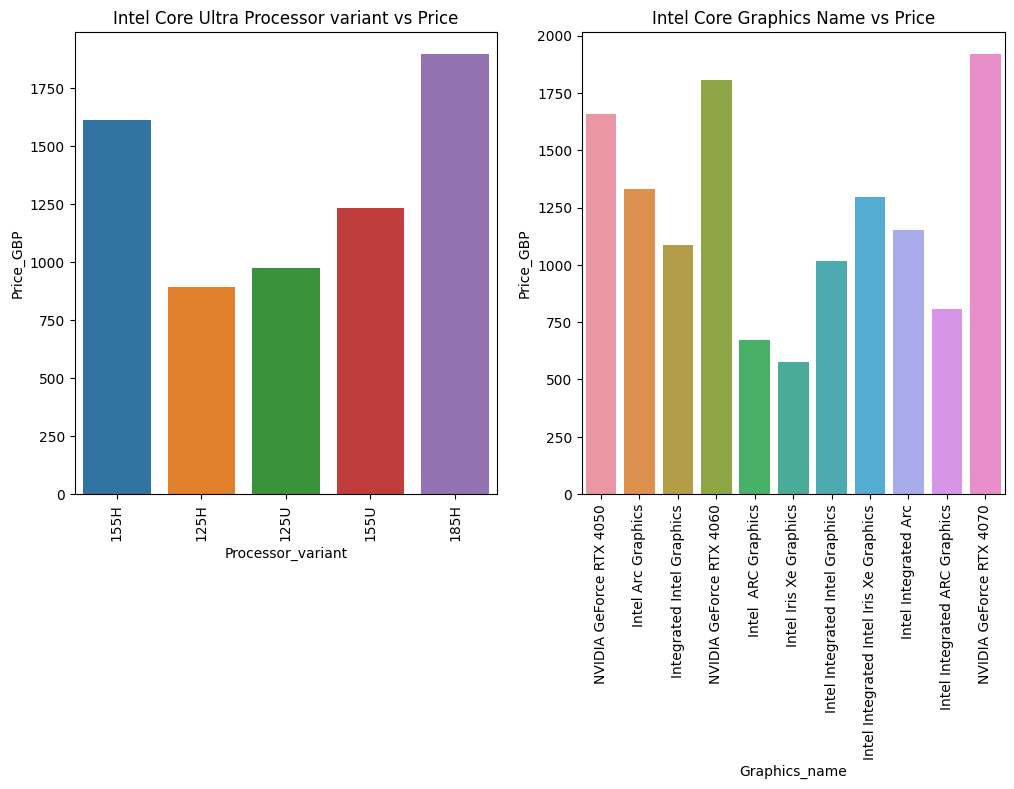

In [26]:
# Plot Intel Core Ultra Processor variants and Graphic Names against Price_GBP
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))

sns.barplot(x='Processor_variant', y='Price_GBP', data=df[df['Processor_name'] == 'Intel Core Ultra'], errorbar=None, ax=ax1)
ax1.set_title('Intel Core Ultra Processor variant vs Price')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

sns.barplot(x='Graphics_name', y='Price_GBP', data=df[df['Processor_name'] == 'Intel Core Ultra'], errorbar=None, ax=ax2)
ax2.set_title('Intel Core Graphics Name vs Price')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.show()

* Both these features seem to contribute to price
* Check these against RAM_GB to see if that is the main reason for the variance, rather than the names

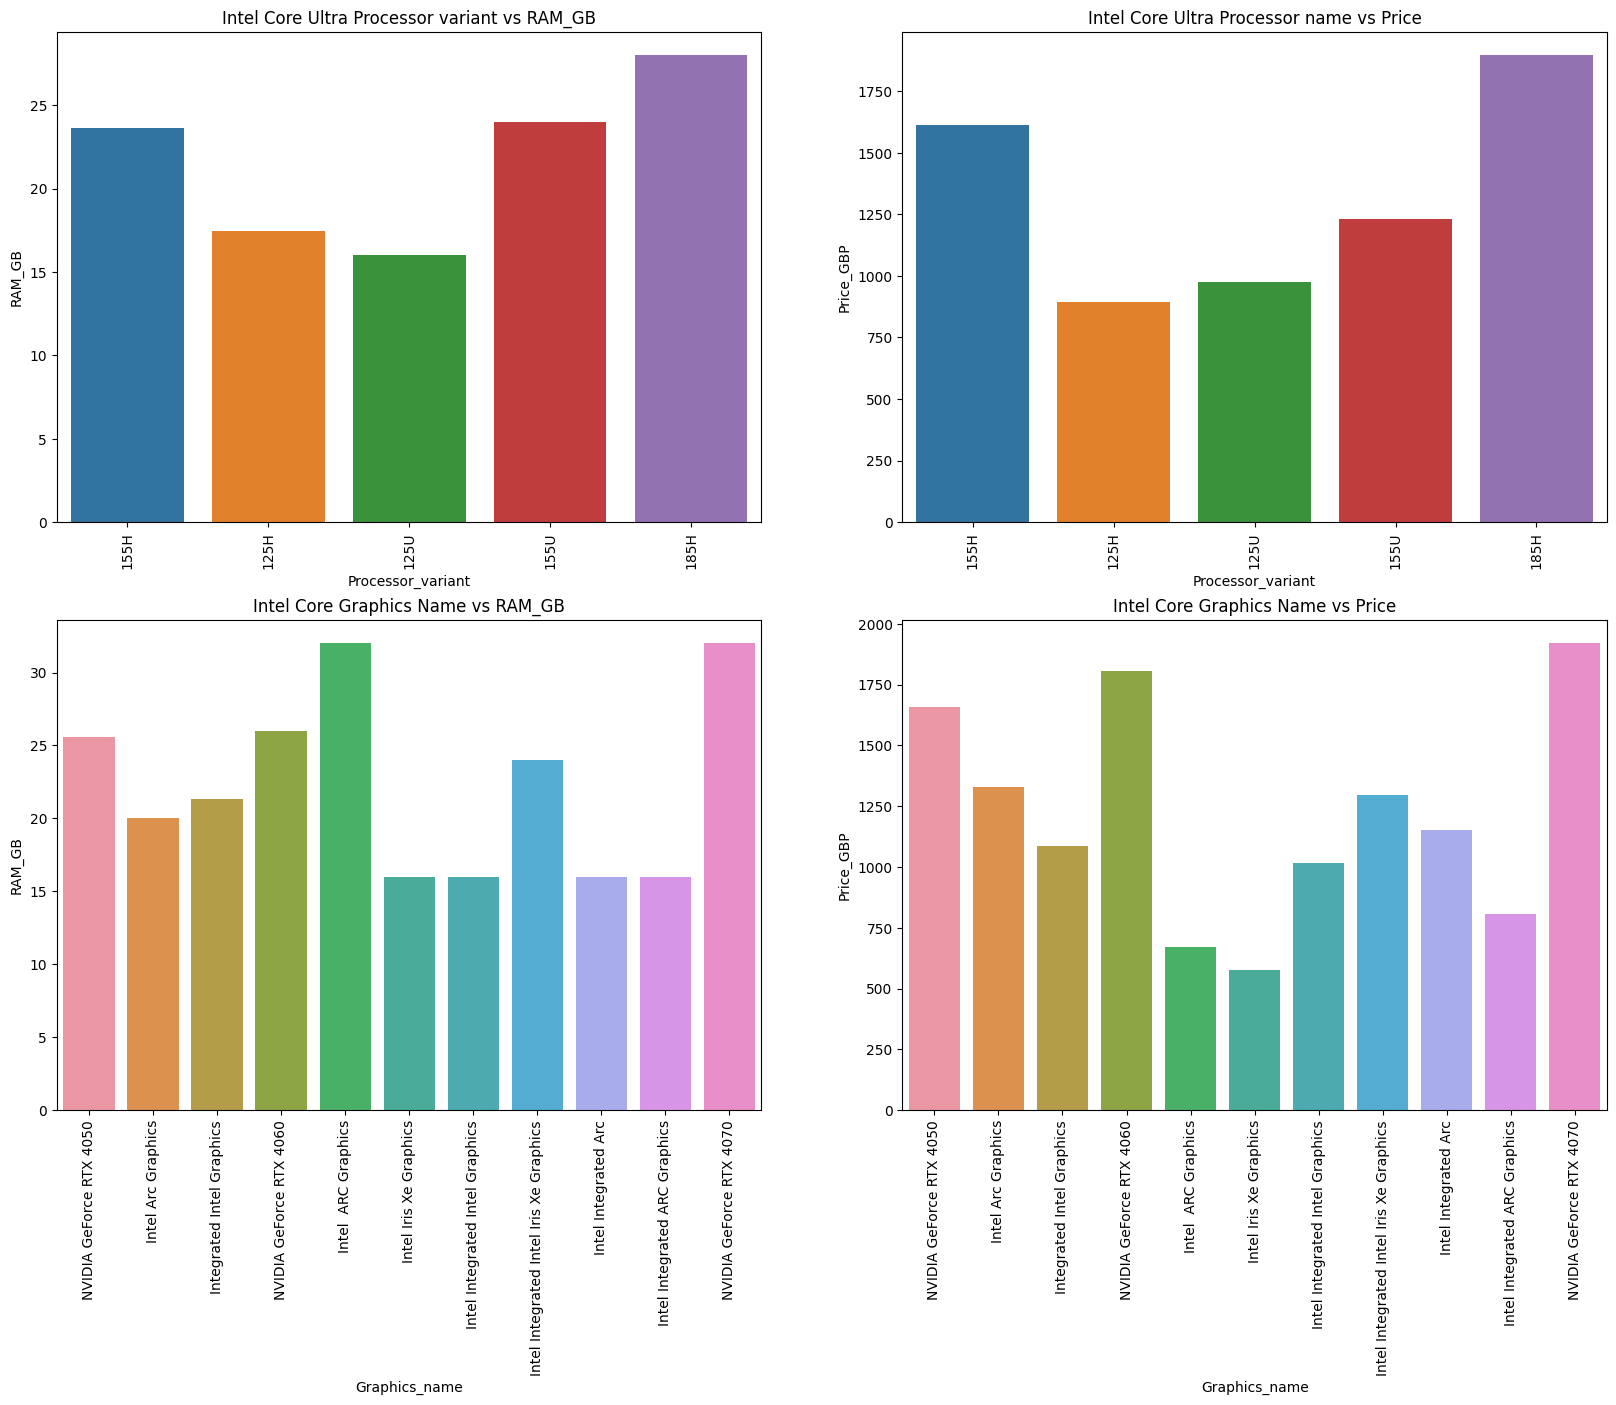

In [27]:
# # Plot Intel Core Ultra Processor variants and Graphic Names against RAM_GB and Price_GBP
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14))
sns.barplot(x='Processor_variant', y='RAM_GB', data=df[df['Processor_name'] == 'Intel Core Ultra'], errorbar=None, ax=ax1)
ax1.set_title('Intel Core Ultra Processor variant vs RAM_GB')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

sns.barplot(x='Processor_variant', y='Price_GBP', data=df[df['Processor_name'] == 'Intel Core Ultra'], errorbar=None, ax=ax2)
ax2.set_title('Intel Core Ultra Processor name vs Price')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

sns.barplot(x='Graphics_name', y='RAM_GB', data=df[df['Processor_name'] == 'Intel Core Ultra'], errorbar=None, ax=ax3)
ax3.set_title('Intel Core Graphics Name vs RAM_GB')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)

sns.barplot(x='Graphics_name', y='Price_GBP', data=df[df['Processor_name'] == 'Intel Core Ultra'], errorbar=None, ax=ax4)
ax4.set_title('Intel Core Graphics Name vs Price')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)

plt.show()

* As the plots are similar for RAM_GB and Price_GBP, I will drop Graphics_name and Processor_variant as the variance from these features is captured enough by RAM_GB

## Preprocessing Data for Clustering

In [28]:
# Recheck columns in dataframe
df.columns

# Re-isolate numerical and categorical columns (As I have dropped columns since defining these)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [29]:
# Create a copy of the dataframe
X = df.copy() 

# Isolate numerical features which have a correlation coefficient with price less than 0.3 so they can be dropped
correlation = X[numerical_columns].corrwith(X['Price_GBP']).sort_values(ascending=False)
numerical_features_to_drop = [col for col in correlation[1:].index if abs(correlation[col]) < 0.3]

# Drop the numerical features with a correlation coefficient less than 0.3
X = X.drop(numerical_features_to_drop, axis=1)

# Also drop 'Name' column as it isn't useful for predictions
X = X.drop('Name', axis=1)

In [30]:
# Investigate features with missing values
X.isnull().sum().sort_values(ascending=False)

Graphics_GB            652
Total_processor        447
Execution_units        447
Threads                 48
Processor_variant       24
RAM_type                22
Core_per_processor      12
Graphics_integreted      2
Graphics_name            2
Graphics_brand           2
Brand                    0
Operating_system         0
Touch_screen             0
ppi                      0
Storage_capacity_GB      0
Storage_type             0
Processor_brand          0
RAM_GB                   0
Processor_name           0
Price_GBP                0
dtype: int64

In [31]:
# Investigate Graphics_GB column
print(X['Graphics_GB'].value_counts())

# Investiate Total_processor column
print(X['Total_processor'].value_counts())

# Investigate Execeution_units column
print(X['Execution_units'].value_counts())

Graphics_GB
4.0     174
6.0      87
8.0      80
12.0     12
16.0     11
2.0       4
Name: count, dtype: int64
Total_processor
2.0     221
4.0     180
6.0     121
8.0      41
1.0       7
12.0      1
5.0       1
10.0      1
Name: count, dtype: int64
Execution_units
8.0     350
4.0     193
16.0     24
12.0      3
6.0       3
Name: count, dtype: int64


In [32]:
# Investigate Threads column
print(X['Threads'].value_counts())

# Investigate RAM_type column
print(X['RAM_type'].value_counts())

Threads
12.0    346
16.0    218
8.0     178
20.0     51
4.0      50
2.0      36
22.0     27
32.0     23
24.0     15
18.0     11
6.0       7
14.0      6
28.0      3
5.0       1
Name: count, dtype: int64
RAM_type
DDR4       522
DDR5       188
LPDDR5     173
LPDDR4X     53
LPDDR5X     38
LPDDR4      16
DDR3         2
LPDDRX4      2
Unified      1
DDR6         1
LPDDR3       1
PDDR5X       1
Name: count, dtype: int64


In [33]:
# Investigate core per processor column
print(X['Core_per_processor'].value_counts())

Core_per_processor
8.0     198
10.0    189
6.0     182
4.0     118
12.0     93
2.0      81
14.0     69
16.0     42
24.0     24
5.0       8
20.0      3
11.0      1
Name: count, dtype: int64


In [34]:
# Investigate Graphics_integreted column
print(X['Graphics_integreted'].value_counts())

X[X['Graphics_integreted'].isnull()]

Graphics_integreted
False    772
True     246
Name: count, dtype: int64


,Brand,Processor_brand,Processor_name,Processor_variant,Core_per_processor,Total_processor,Execution_units,Threads,RAM_GB,RAM_type,Storage_capacity_GB,Storage_type,Graphics_name,Graphics_brand,Graphics_GB,Graphics_integreted,ppi,Touch_screen,Operating_system,Price_GBP
648,Huawei,HiSilicon,HiSilicon Kirin 9006C 9006C,9006C,NaN,NaN,NaN,NaN,16,NaN,512,SSD,NaN,NaN,NaN,NaN,185.43,False,Linux OS,787.1904
998,Dell,Intel,Intel Core i7,1355U,10.0,2.0,8.0,12.0,16,DDR4,512,SSD,NaN,NaN,NaN,NaN,137.68,False,Windows 11 OS,911.9040


In [35]:
# Impute the modal value for the below columns
columns_to_impute = ['Graphics_GB', 'Total_processor', 'Execution_units', 'Threads', 'RAM_type', 'Core_per_processor', 'Processor_variant']

# Impute the modal value for each column
for col in columns_to_impute:
    X[col] = X[col].fillna(X[col].mode()[0])
    
# Drop the 2 records with no Graphics_integreted value
X = X.dropna()

# Recheck for missing values
print(f"There are {X.isnull().values.sum()} null values remaining")

# Recheck data shape
print(f"The data frame has {X.shape[0]} rows and {X.shape[1]} columns")

There are 0 null values remaining
The data frame has 1018 rows and 20 columns


In [36]:
# Re-isolate new numerical columns
numerical_columns = X.drop('Price_GBP', axis=1).select_dtypes(include=['float64', 'int64']).columns

# Scale numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

* I can now perform clustering
* Further pre-processing will be required before regression takes place such as encoding categorical features

## KMeans

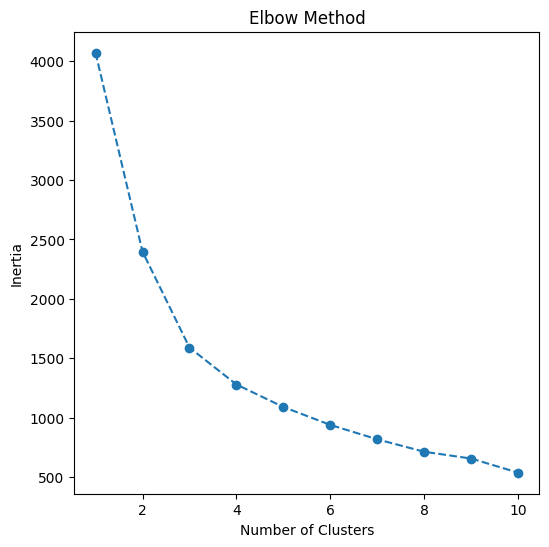

In [37]:
# Import KMeans
from sklearn.cluster import KMeans

# Isolate features found earlier on to form clusters
X_clust = X[['Graphics_GB', 'RAM_GB', 'Threads', 'Core_per_processor']]

# Use elbow method to find optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_clust)
    inertia.append(kmeans.inertia_)

# Plot the inertia values
plt.figure(figsize=(6, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

* There is a clear inflection point at k=3
* This is around what I expected as I intend on spltting the laptops into low range, mid-range, and premium range clusters

In [38]:
# Create clusters
k=3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
X['Cluster'] = kmeans.fit_predict(X_clust)

In [39]:
# View cluster counts
X['Cluster'].value_counts()

Cluster
2    570
1    375
0     73
Name: count, dtype: int64

In [40]:
# Print cluster 0 statistics
def cluster_statistics(cluster_number):
    print(f"Cluster {cluster_number} statistics")
    print(X[X_clust.columns][X['Cluster'] == cluster_number].describe())
    
cluster_statistics(0)

Cluster 0 statistics
       Graphics_GB     RAM_GB    Threads  Core_per_processor
count    73.000000  73.000000  73.000000           73.000000
mean      2.549063   2.260447   2.135971            2.174562
std       1.864997   1.639793   1.056034            1.065552
min      -0.378519   0.279705  -0.140775           -0.129802
25%       1.780204   0.279705   1.301329            1.708652
50%       1.780204   2.504231   2.022380            1.708652
75%       3.938926   2.504231   3.464484            3.547107
max       6.097648   6.953283   3.464484            3.547107


In [41]:
# Print cluster 1 statistics
cluster_statistics(1)

Cluster 1 statistics
       Graphics_GB      RAM_GB     Threads  Core_per_processor
count   375.000000  375.000000  375.000000          375.000000
mean     -0.381397   -0.726523   -0.871922           -0.883569
std       0.055738    0.414356    0.573068            0.434601
min      -1.457880   -1.666756   -1.943405           -1.508643
25%      -0.378519   -0.832558   -1.042090           -1.049030
50%      -0.378519   -0.832558   -0.861827           -1.049030
75%      -0.378519   -0.832558   -0.140775           -0.589416
max      -0.378519    0.279705   -0.140775           -0.129802


In [42]:
# Print cluster 2 statistics
cluster_statistics(2)

Cluster 2 statistics
       Graphics_GB      RAM_GB     Threads  Core_per_processor
count   570.000000  570.000000  570.000000          570.000000
mean     -0.075540    0.188480    0.300079            0.302799
std       0.641658    0.544982    0.505519            0.555200
min      -1.457880   -0.832558   -0.140775           -0.589416
25%      -0.378519    0.279705   -0.140775           -0.129802
50%      -0.378519    0.279705    0.039488            0.329811
75%      -0.378519    0.279705    0.580277            0.789425
max       1.780204    3.060362    2.022380            1.708652


* Cluster 0 represents high-end laptops
* Cluster 1 represents low-end laptops
* Cluster 2 represents mid-range laptops
* Only 73 out of the 1018 records fall into the high-end cluster

In [43]:
# Rename the clusters accordingly
X['Cluster'] = X['Cluster'].map({0: 'High-end', 1: 'Low-end', 2: 'Mid-range'})

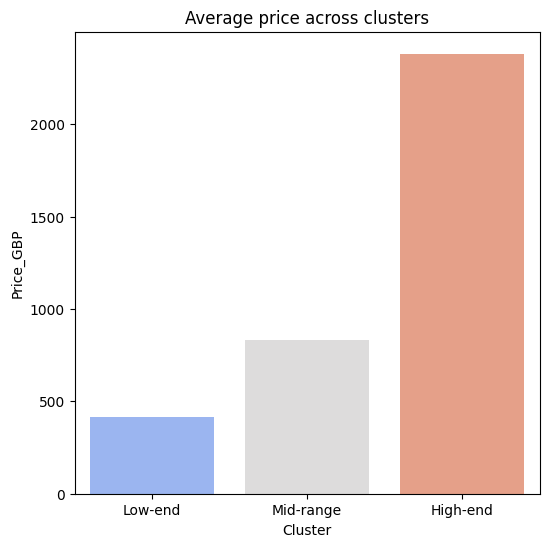

In [44]:
# Visualise the average scaled price across clusters
plt.figure(figsize=(6, 6))
sns.barplot(x='Cluster', y='Price_GBP', data=X, palette='coolwarm', errorbar=None)
plt.title('Average price across clusters')
plt.show()

## Pre-processing for Regression

In [45]:
# Recheck columns in X
X.columns

Index(['Brand', 'Processor_brand', 'Processor_name', 'Processor_variant',
       'Core_per_processor', 'Total_processor', 'Execution_units', 'Threads',
       'RAM_GB', 'RAM_type', 'Storage_capacity_GB', 'Storage_type',
       'Graphics_name', 'Graphics_brand', 'Graphics_GB', 'Graphics_integreted',
       'ppi', 'Touch_screen', 'Operating_system', 'Price_GBP', 'Cluster'],
      dtype='object')

In [46]:
# Recheck categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Reheck unique values in categorical columns
for column in categorical_columns:
    print(f"{column}: {X[column].nunique()} unique values")

Brand: 31 unique values
Processor_brand: 6 unique values
Processor_name: 35 unique values
Processor_variant: 124 unique values
RAM_type: 12 unique values
Storage_type: 4 unique values
Graphics_name: 136 unique values
Graphics_brand: 7 unique values
Graphics_integreted: 2 unique values
Operating_system: 12 unique values
Cluster: 3 unique values


In [47]:
# As per EDA, drop high cardinality columns
X = X.drop(['Processor_name', 'Processor_variant', 'Graphics_name'], axis=1)

In [48]:
# Check brand unique values
X['Brand'].value_counts()

Brand
Lenovo       217
HP           213
Asus         157
Dell         115
MSI           97
Acer          69
Samsung       32
Apple         20
Infinix       20
Chuwi          8
LG             7
Zebronics      7
Microsoft      7
Avita          6
Gigabyte       6
Honor          6
Xiaomi         6
Ultimus        5
Fujitsu        3
Wings          3
Primebook      3
AXL            2
Jio            1
ASUS           1
Ninkear        1
Walker         1
Huawei         1
iBall          1
Tecno          1
Razer          1
Colorful       1
Name: count, dtype: int64

In [49]:
# Rename any brand with a count less than 10 as 'Other'
X['Brand'] = X['Brand'].apply(lambda x: 'Other' if X['Brand'].value_counts()[x] < 10 else x)
X['Brand'].value_counts()

Brand
Lenovo     217
HP         213
Asus       157
Dell       115
MSI         97
Other       78
Acer        69
Samsung     32
Apple       20
Infinix     20
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


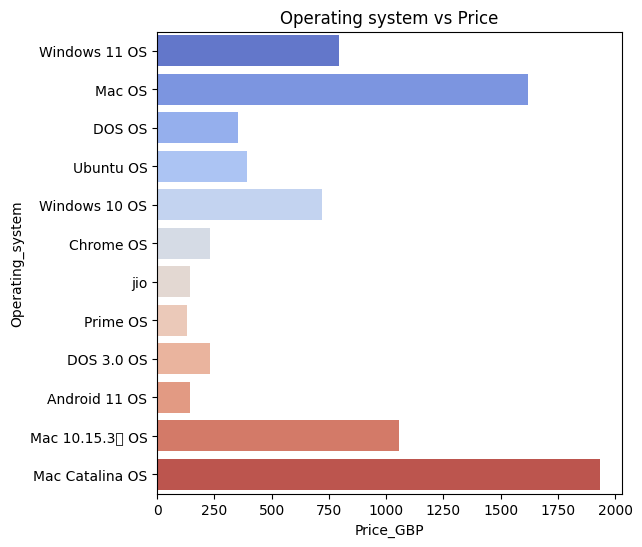

In [50]:
# Invesitgate how operating system impacts price
plt.figure(figsize=(6, 6))
sns.barplot(x='Price_GBP', y='Operating_system', data=X, palette='coolwarm', errorbar=None)
plt.title('Operating system vs Price')
plt.show()

* It tends to be Apple operating systems that cause the highest price
* This information is captured in the Processor_brand feature, so the Operating_system feature can be dropped

In [51]:
# Drop Operating_system column
X = X.drop('Operating_system', axis=1)

In [52]:
# Check unique values left in categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"{column}: {X[column].nunique()} unique values")

Brand: 10 unique values
Processor_brand: 6 unique values
RAM_type: 12 unique values
Storage_type: 4 unique values
Graphics_brand: 7 unique values
Graphics_integreted: 2 unique values
Cluster: 3 unique values


In [53]:
# Investigate Storage_type column
print(X['Storage_type'].value_counts())

# Investigate Graphics_brand column
print(X['Graphics_brand'].value_counts())

Storage_type
 SSD               997
 Hard Disk          14
Hard Disk & SSD      6
 NVMe SSD            1
Name: count, dtype: int64
Graphics_brand
Intel     486
NVIDIA    354
AMD       151
Apple      18
ARM         7
Adreno      1
Radeon      1
Name: count, dtype: int64


In [54]:
# Investigate Touchscreen column
print(X['Touch_screen'].value_counts())

Touch_screen
False    902
True     116
Name: count, dtype: int64


In [55]:
# Drop Storage_type, Touch_screen and Graphics_brand columns. Storage_type is almost all SSD, Touch Screen is almost all False,
# and Graphics_brand has similar information to Processor_brand
X = X.drop(['Storage_type', 'Graphics_brand', 'Touch_screen'], axis=1)

In [56]:
# Print final selection of columns to use and their data types
X.dtypes

Brand                   object
Processor_brand         object
Core_per_processor     float64
Total_processor        float64
Execution_units        float64
Threads                float64
RAM_GB                 float64
RAM_type                object
Storage_capacity_GB    float64
Graphics_GB            float64
Graphics_integreted     object
ppi                    float64
Price_GBP              float64
Cluster                 object
dtype: object

In [57]:
# Encode categorical columns
from sklearn.preprocessing import OrdinalEncoder

# Ordinal encode the cluster column
encoder = OrdinalEncoder(categories=[['Low-end', 'Mid-range', 'High-end']])
X['Cluster'] = encoder.fit_transform(X['Cluster'].values.reshape(-1,1))

# One hot encode the categorical columns
X = pd.get_dummies(X, drop_first=True)

# Check the shape of the dataframe
print(f"The data frame has {X.shape[0]} rows and {X.shape[1]} columns")

# Check the data types of the columns
X.dtypes

The data frame has 1018 rows and 36 columns


Core_per_processor           float64
Total_processor              float64
Execution_units              float64
Threads                      float64
RAM_GB                       float64
Storage_capacity_GB          float64
Graphics_GB                  float64
ppi                          float64
Price_GBP                    float64
Cluster                      float64
Brand_Apple                     bool
Brand_Asus                      bool
Brand_Dell                      bool
Brand_HP                        bool
Brand_Infinix                   bool
Brand_Lenovo                    bool
Brand_MSI                       bool
Brand_Other                     bool
Brand_Samsung                   bool
Processor_brand_Apple           bool
Processor_brand_Intel           bool
Processor_brand_MediaTek        bool
Processor_brand_Microsoft       bool
Processor_brand_Qualcomm        bool
RAM_type_DDR4                   bool
RAM_type_DDR5                   bool
RAM_type_DDR6                   bool
R

## XGBoost Regression

In [58]:
# Split the data into features and target
y = X['Price_GBP']
X = X.drop('Price_GBP', axis=1)

# Create training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Import XGBRegressor and RandomizedSearchCV for hyperparameter tuning
from xgboost import XGBRegressor

# Create a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.1, 0.3],
    'reg_lambda': [0, 0.1, 0.3]
}

# Instantiate the XGBRegressor
xgb = XGBRegressor(random_state=42)

# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=100, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, random_state=42)

# Fit the model
search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1],
                                        'gamma': [0, 0.1, 0.3],
                                        'learning_rate': [0.01, 0.1, 0.3],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.1, 0.3],
                                        'reg_lambda': [0, 0.1, 0.3],
                                        'subsample': [0.5, 0.7, 1]},
                   random_state=42, scoring='neg_mean_squared_error')

In [60]:
# Print the best parameters
print(search.best_params_)
print(search.best_score_)

{'subsample': 0.7, 'reg_lambda': 0.1, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}
-66807.91174013706


In [61]:
# Predict the test set
y_pred = search.predict(X_test)

# Score the model accuracy and check for overfitting
from sklearn.metrics import r2_score

train_score = r2_score(y_train, search.predict(X_train))
test_score = r2_score(y_test, y_pred)
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")

Train score: 0.9894956501428884
Test score: 0.8599697172468648


In [62]:
# Repeat the test without using the cluster column as a feature
X = X.drop(['Cluster'], axis=1)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1],
                                        'gamma': [0, 0.1, 0.3],
                                        'learning_rate': [0.01, 0.1, 0.3],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.1, 0.3],
                                        'reg_lambda': [0, 0.1, 0.3],
                                        'subsample': [0.5, 0.7, 1]},
                   random_state=42, scoring='neg_mean_squared_error')

In [63]:
# Predict the test set
y_pred = search.predict(X_test)

# Score the model accuracy and check for overfitting
train_score = r2_score(y_train, search.predict(X_train))
test_score = r2_score(y_test, y_pred)
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")

Train score: 0.9828062786837438
Test score: 0.786981520840176


## Conclusions

**Findings**
* Conducting EDA allowed me to make informed decisions about features that contribute to the target variable, Laptop price
* As expected, the KMeans model split the data into three clusters of low-end, mid-range, and high-end laptops
* These clusters could be further analysed or for marketting certain laptops to customers based on the range of laptop they are looking for
* The R2 score with using 'Cluster as a feature was around 0.86, whereas without 'Cluster', R2 score was 0.786
* In this example, using the cluster labels as a feature caused quite a significant uplift in R2 score. This is an interesting finding and something I'd like to explore further in future work.
* The R2 score on the test set was high which indicates that the XGBoost models were well adapted to the unseen test data.

**Possible improvements**
* Try different clustering methods than KMeans such as DBSCAN
* Try a range of regression models to see if the R2 score can be further improved on
* Explain the model results. This may require using a more interpretable model than XGBoost